In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("/home/placement/Desktop/csv/fiat500.csv")

In [4]:
data.head()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [5]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [6]:
data1=data.drop(['ID','lat','lon'],axis=1)

In [7]:
data1

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [8]:
data1.shape

(1538, 6)

In [9]:
data1=pd.get_dummies(data1)
data1

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0
...,...,...,...,...,...,...,...,...
1533,51,3712,115280,1,5200,0,0,1
1534,74,3835,112000,1,4600,1,0,0
1535,51,2223,60457,1,7500,0,1,0
1536,51,2557,80750,1,5990,1,0,0


In [10]:
data1.shape

(1538, 8)

In [11]:
y=data1['price']
x=data1.drop(['price'],axis=1)

In [12]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [13]:
x

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,51,882,25000,1,1,0,0
1,51,1186,32500,1,0,1,0
2,74,4658,142228,1,0,0,1
3,51,2739,160000,1,1,0,0
4,73,3074,106880,1,0,1,0
...,...,...,...,...,...,...,...
1533,51,3712,115280,1,0,0,1
1534,74,3835,112000,1,1,0,0
1535,51,2223,60457,1,0,1,0
1536,51,2557,80750,1,1,0,0


In [14]:
#!pip install scikit-learn

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

In [16]:
x_test.shape

(508, 7)

In [17]:
x_train.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
527,51,425,13111,1,1,0,0
129,51,1127,21400,1,1,0,0
602,51,2039,57039,1,0,1,0
331,51,1155,40700,1,1,0,0
323,51,425,16783,1,1,0,0


In [18]:
y_test.head(5)

481     7900
76      7900
1502    9400
669     8500
1409    9700
Name: price, dtype: int64

In [19]:
y_train

527      9990
129      9500
602      7590
331      8750
323      9100
        ...  
1130    10990
1294     9800
860      5500
1459     9990
1126     8900
Name: price, Length: 1030, dtype: int64

In [20]:
y_train.head(5)

527    9990
129    9500
602    7590
331    8750
323    9100
Name: price, dtype: int64

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [22]:
ypred=reg.predict(x_test)

In [23]:
ypred

array([ 5867.6503378 ,  7133.70142341,  9866.35776216,  9723.28874535,
       10039.59101162,  9654.07582608,  9673.14563045, 10118.70728123,
        9903.85952664,  9351.55828437, 10434.34963575,  7732.26255693,
        7698.67240131,  6565.95240435,  9662.90103518, 10373.20344286,
        9599.94844451,  7699.34400418,  4941.33017994, 10455.2719478 ,
       10370.51555682, 10391.60424404,  7529.06622456,  9952.37340054,
        7006.13845729,  9000.1780961 ,  4798.36770637,  6953.10376491,
        7810.39767825,  9623.80497535,  7333.52158317,  5229.18705519,
        5398.21541073,  5157.65652129,  8948.63632836,  5666.62365159,
        9822.1231461 ,  8258.46551788,  6279.2040404 ,  8457.38443276,
        9773.86444066,  6767.04074749,  9182.99904787, 10210.05195479,
        8694.90545226, 10328.43369248,  9069.05761443,  8866.7826029 ,
        7058.39787506,  9073.33877162,  9412.68162121, 10293.69451263,
       10072.49011135,  6748.5794244 ,  9785.95841801,  9354.09969973,
      

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8415526986865394

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)

581887.727391353

In [26]:
import math
a=581887.727391353
print(math.sqrt(a))

762.8156575420782


In [27]:
ypred

array([ 5867.6503378 ,  7133.70142341,  9866.35776216,  9723.28874535,
       10039.59101162,  9654.07582608,  9673.14563045, 10118.70728123,
        9903.85952664,  9351.55828437, 10434.34963575,  7732.26255693,
        7698.67240131,  6565.95240435,  9662.90103518, 10373.20344286,
        9599.94844451,  7699.34400418,  4941.33017994, 10455.2719478 ,
       10370.51555682, 10391.60424404,  7529.06622456,  9952.37340054,
        7006.13845729,  9000.1780961 ,  4798.36770637,  6953.10376491,
        7810.39767825,  9623.80497535,  7333.52158317,  5229.18705519,
        5398.21541073,  5157.65652129,  8948.63632836,  5666.62365159,
        9822.1231461 ,  8258.46551788,  6279.2040404 ,  8457.38443276,
        9773.86444066,  6767.04074749,  9182.99904787, 10210.05195479,
        8694.90545226, 10328.43369248,  9069.05761443,  8866.7826029 ,
        7058.39787506,  9073.33877162,  9412.68162121, 10293.69451263,
       10072.49011135,  6748.5794244 ,  9785.95841801,  9354.09969973,
      

In [28]:
results=pd.DataFrame(columns=['price','predicate'])
results['price']=y_test
results['predicate']=ypred
results=results.reset_index()
results['ID']=results.index
results.head(15)

,index,price,predicate,ID
0,481,7900,5867.650338,0
1,76,7900,7133.701423,1
2,1502,9400,9866.357762,2
3,669,8500,9723.288745,3
4,1409,9700,10039.591012,4
5,1414,9900,9654.075826,5
6,1089,9900,9673.145630,6
7,1507,9950,10118.707281,7
8,970,10700,9903.859527,8
9,1198,8999,9351.558284,9


<Axes: xlabel='ID', ylabel='price'>

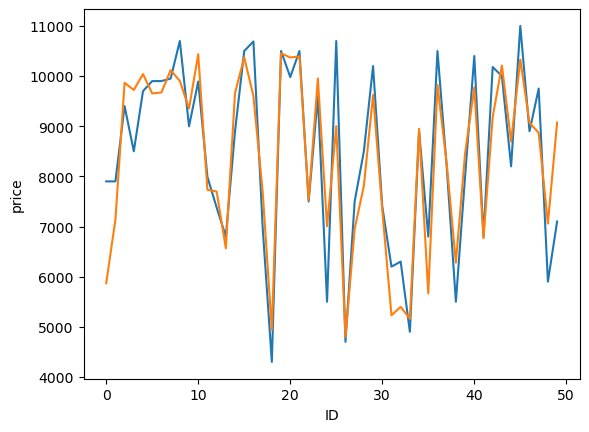

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID' ,y='price' ,data=results.head(50))
sns.lineplot(x='ID' ,y='predicate' ,data=results.head(50))